# **Analyzing Multi-Cloud Service Performance for DevOps Engineers**
_In-Depth Analysis of Key Performance Indicators in Multi-Cloud Environments_

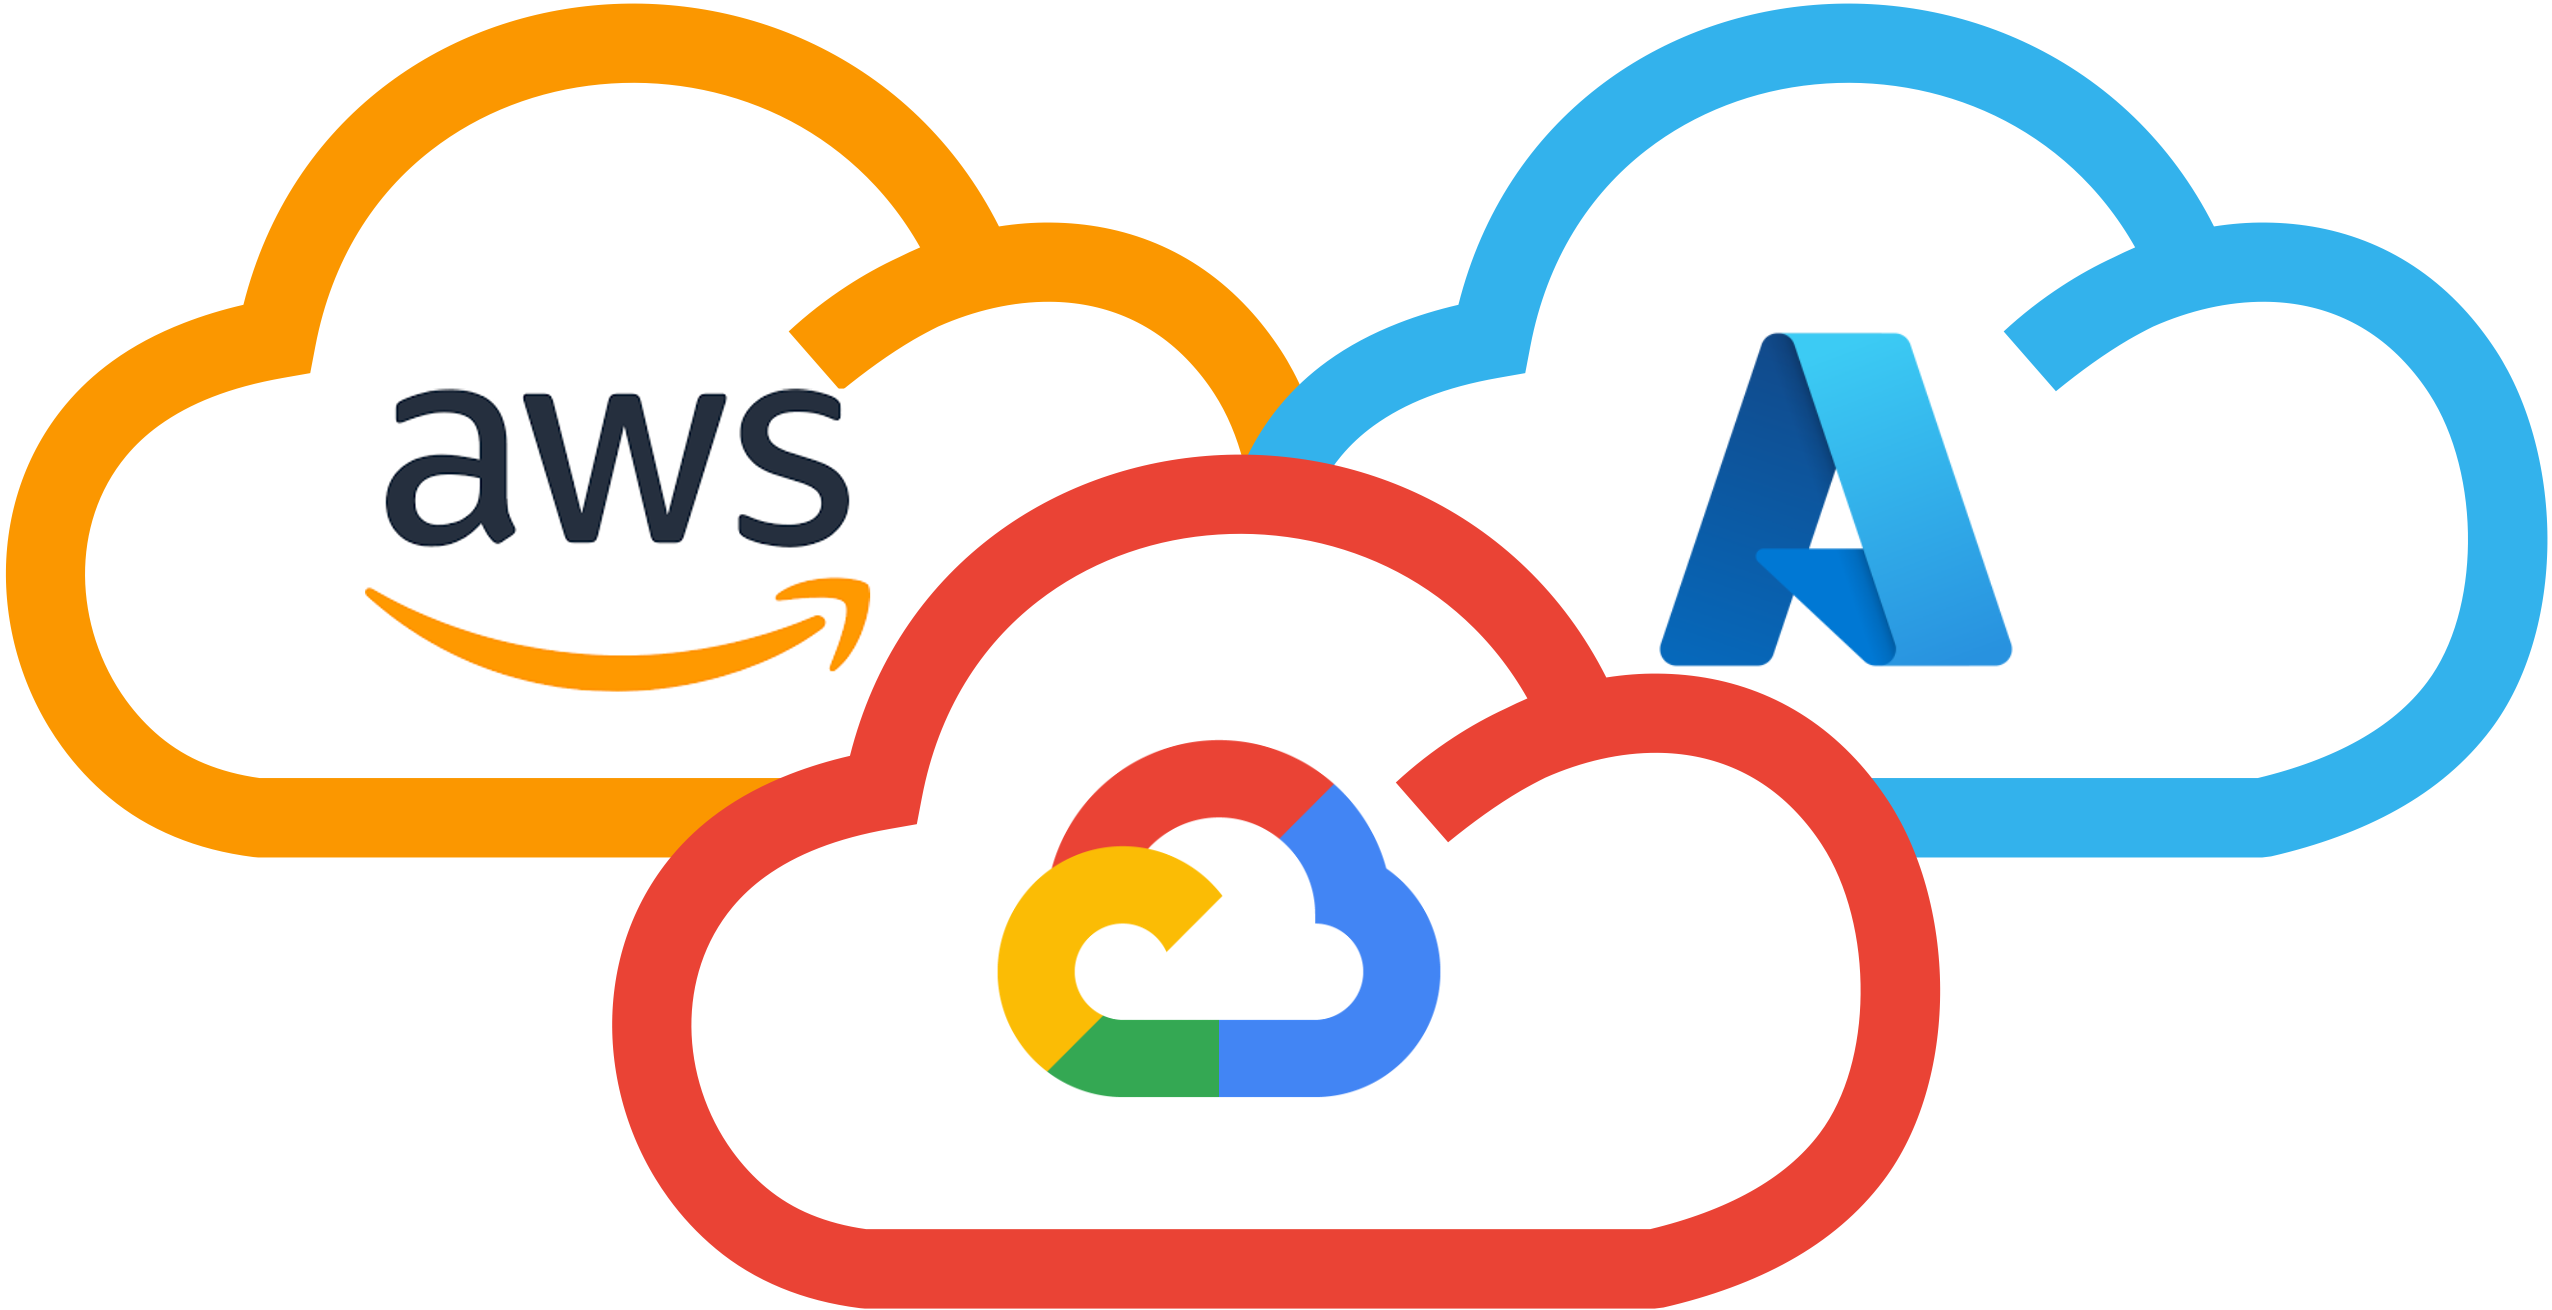



## **Introduction**

Choosing the right cloud platform can feel like navigating a maze, right? As DevOps engineers, we're constantly balancing the unique needs of our teams – whether it's the horsepower for AI models, the memory for massive datasets, or intricate network configurations. The rise of multiple cloud providers offers incredible flexibility, but it also adds complexity. How do you ensure you're making the best choice? That's where this analysis comes in. We'll cut through the noise and explore various cloud platforms, comparing them across key metrics to help you make informed decisions and build the optimal infrastructure for your team.

Here's how we'll approach the analysis:
- Downloading the [Multi-Cloud](https://www.kaggle.com/datasets/ziya07/multi-cloud-service-composition-dataset) Dataset from Kaggle.
- Installing and Importing Essential Libraries for Analysis
- Preprocessing and Data Cleaning
- Exploratory Data Analysis (EDA)
- Conclusion
- References

## **Downloading the [Multi-Cloud](https://www.kaggle.com/datasets/ziya07/multi-cloud-service-composition-dataset) Dataset from Kaggle**

In [45]:
import kagglehub
path = kagglehub.dataset_download("ziya07/multi-cloud-service-composition-dataset")
print("Path to dataset files:", path)

Path to dataset files: /Users/suraj/.cache/kagglehub/datasets/ziya07/multi-cloud-service-composition-dataset/versions/1


In [46]:
! mv /Users/suraj/.cache/kagglehub/datasets/ziya07/multi-cloud-service-composition-dataset/versions/1/* .


zsh:1: no matches found: /Users/suraj/.cache/kagglehub/datasets/ziya07/multi-cloud-service-composition-dataset/versions/1/*


### **About the Data**
The dataset consists of `15 columns` and a `10000 rows`.

#### **Columns**
- `Service_ID`: A unique identifier for a specific running service instance.
- `Service_Type`: The functional category of the service (e.g., web-server, database).
- `Cloud_Provider`: The vendor providing the cloud infrastructure (e.g., AWS, Azure, GCP).
- `Edge_Node_ID`: The unique ID of the edge computing node where the service is deployed.
- `CPU_Utilization (%)`: The percentage of the CPU's processing power currently being used.
- `Memory_Usage (MB):` The amount of RAM (in megabytes) currently consumed by the service.
- `Storage_Usage (GB):` The amount of disk space (in gigabytes) currently used by the service.
- `Network_Bandwidth (Mbps):` The current data transfer rate in megabits per second.
- `Service_Latency (ms):` The network delay (in milliseconds) for a request to reach the service.
- `Response_Time (ms):` The total time (in milliseconds) to get a full response after a request.
- `Throughput (Requests/sec)`: The number of requests the service successfully handles per second.
- `Load_Balancing (%)`: The percentage of total traffic this service instance is handling.
- `QoS_Score`: A single, composite score representing the overall service quality and health.
- `Workload_Variability`: A measure of how much the service's demand fluctuates over time.
- `Optimal_Service_Placement`: This is the target variable (1: Optimal, 0: Suboptimal) based on other metrices.




## **Installing and Importing Essential Libraries for Analysis**


In [47]:
#!pip3 install pandas numpy matplotlib plotly.express seaborn pyarrow wordcloud --quiet
#!pip3 install --upgrade nbformat --quiet


In [48]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
# This will suppress all warnings that follow
warnings.filterwarnings('ignore')

## **Preprocessing and Data Cleaning**


Let's go ahead and read the data from the CSV, using pandas

In [49]:
df=pd.read_csv("multi_cloud_service_dataset.csv")
df.head()

,Service_ID,Service_Type,Cloud_Provider,Edge_Node_ID,CPU_Utilization (%),Memory_Usage (MB),Storage_Usage (GB),Network_Bandwidth (Mbps),Service_Latency (ms),Response_Time (ms),Throughput (Requests/sec),Load_Balancing (%),QoS_Score,Workload_Variability,Optimal_Service_Placement
0,S0001,Database,IBM,E3,73.724254,6966,458,684.539483,161.677301,473.292482,992.471026,83.072391,0.803979,3,0
1,S0002,AI Model,IBM,E4,25.406325,1381,981,940.781359,224.986712,319.738860,647.689492,94.095164,0.552381,1,0
2,S0003,Network,IBM,E1,25.344255,1397,185,56.317987,248.652571,223.293435,401.778413,70.469457,0.727114,3,0
3,S0004,AI Model,IBM,E4,20.908136,2513,250,326.455535,210.485614,267.325408,264.844020,64.494034,0.619383,2,0
4,S0005,AI Model,IBM,E3,91.737605,6809,299,443.794949,277.601532,107.818116,879.188722,50.725755,0.917782,1,0


Now, lets inspect the various columns in the dataset.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Service_ID                 1000 non-null   object 
 1   Service_Type               1000 non-null   object 
 2   Cloud_Provider             1000 non-null   object 
 3   Edge_Node_ID               1000 non-null   object 
 4   CPU_Utilization (%)        1000 non-null   float64
 5   Memory_Usage (MB)          1000 non-null   int64  
 6   Storage_Usage (GB)         1000 non-null   int64  
 7   Network_Bandwidth (Mbps)   1000 non-null   float64
 8   Service_Latency (ms)       1000 non-null   float64
 9   Response_Time (ms)         1000 non-null   float64
 10  Throughput (Requests/sec)  1000 non-null   float64
 11  Load_Balancing (%)         1000 non-null   float64
 12  QoS_Score                  1000 non-null   float64
 13  Workload_Variability       1000 non-null   int64 

Lets inspect all the object based columns

In [51]:
df["Service_ID"].value_counts().value_counts()

count
1    1000
Name: count, dtype: int64

### Preprocessing non numerical data

It's, visible that all the columns in the `Service_ID` are unique.

In [52]:
df["Service_Type"].value_counts()

Service_Type
Compute     210
Database    206
AI Model    204
Network     190
Storage     190
Name: count, dtype: int64

`Service_Type` has only 5 unique values that are
- Compute     
- Database    
- AI Model    
- Network     
- Storage 

Let's go ahead and convert them into categorical data.



In [53]:
df["Service_Type"]=df["Service_Type"].astype("category")

Let's do the same thing for `Edge_Node_ID` and `Cloud_Provider` too,

In [54]:
df["Cloud_Provider"]=df["Cloud_Provider"].astype("category")
df["Edge_Node_ID"]=df["Edge_Node_ID"].astype("category")

Now that we have non numerical values out of the way, let process the numerical values.

### Preprocessing numerical data

#### **QoS_Score**

In [55]:
df.describe()

,CPU_Utilization (%),Memory_Usage (MB),Storage_Usage (GB),Network_Bandwidth (Mbps),Service_Latency (ms),Response_Time (ms),Throughput (Requests/sec),Load_Balancing (%),QoS_Score,Workload_Variability,Optimal_Service_Placement
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,57.379542,4323.775000,543.02500,490.571753,148.505387,255.280219,536.468528,74.937218,0.747944,2.003000,0.041000
std,21.659939,2169.986795,278.13723,288.644163,84.624983,140.533949,275.052773,14.672850,0.143198,0.810955,0.198389
min,20.010102,514.000000,50.00000,10.184663,5.612573,10.307483,52.766132,50.067776,0.500566,1.000000,0.000000
25%,39.486064,2662.750000,296.00000,240.634131,75.672386,137.165819,307.629777,62.906168,0.625372,1.000000,0.000000
50%,57.449631,4249.000000,539.00000,479.556599,147.818955,259.304455,541.913506,74.492707,0.752989,2.000000,0.000000
75%,76.342048,6132.000000,783.00000,742.932202,220.100071,370.190384,777.097678,87.922459,0.867621,3.000000,0.000000
max,94.876063,8188.000000,999.00000,997.646594,299.719602,499.926130,998.322325,99.987064,0.999748,3.000000,1.000000


Let's convert the `QoS_Score` to percentage for better understanding

In [56]:
df["QoS_Score"]*100

0      80.397885
1      55.238127
2      72.711391
3      61.938295
4      91.778240
         ...    
995    86.795099
996    91.925050
997    97.479338
998    93.467642
999    74.165572
Name: QoS_Score, Length: 1000, dtype: float64

In [57]:
df["QoS_Score"]=df["QoS_Score"]*100

Lets also rename the column,

In [58]:
df.rename(columns={"QoS_Score":"QoS_Score (%)"}, inplace=True)

In [59]:
df.head()

,Service_ID,Service_Type,Cloud_Provider,Edge_Node_ID,CPU_Utilization (%),Memory_Usage (MB),Storage_Usage (GB),Network_Bandwidth (Mbps),Service_Latency (ms),Response_Time (ms),Throughput (Requests/sec),Load_Balancing (%),QoS_Score (%),Workload_Variability,Optimal_Service_Placement
0,S0001,Database,IBM,E3,73.724254,6966,458,684.539483,161.677301,473.292482,992.471026,83.072391,80.397885,3,0
1,S0002,AI Model,IBM,E4,25.406325,1381,981,940.781359,224.986712,319.738860,647.689492,94.095164,55.238127,1,0
2,S0003,Network,IBM,E1,25.344255,1397,185,56.317987,248.652571,223.293435,401.778413,70.469457,72.711391,3,0
3,S0004,AI Model,IBM,E4,20.908136,2513,250,326.455535,210.485614,267.325408,264.844020,64.494034,61.938295,2,0
4,S0005,AI Model,IBM,E3,91.737605,6809,299,443.794949,277.601532,107.818116,879.188722,50.725755,91.778240,1,0


#### **Workload_Variability**

In [60]:
df["Workload_Variability"].value_counts()

Workload_Variability
2    343
3    330
1    327
Name: count, dtype: int64

There are only 3 values in the `Workload_Variability` column, let's convert them into categorical

In [61]:
df["Workload_Variability"]=df["Workload_Variability"].astype("category")

#### **Optimal_Service_Placement**
This is the target variable it can be either 0 or 1, lets convert it into boolean.

In [62]:
df["Optimal_Service_Placement"].value_counts()

Optimal_Service_Placement
0    959
1     41
Name: count, dtype: int64

In [63]:
df["Optimal_Service_Placement"]=df["Optimal_Service_Placement"].astype(bool)
df["Optimal_Service_Placement"].value_counts()

Optimal_Service_Placement
False    959
True      41
Name: count, dtype: int64

## **Exploratory Data Analysis (EDA)**


In this section, we will delve into the various columns of the dataset to understand their individual characteristics, such as distribution and central tendency. Furthermore, we will investigate the relationships and correlations between columns to uncover initial patterns and guide our subsequent, more targeted analysis.

In [64]:
def cols():
    return df.columns.to_list()
cols=cols()

In [65]:
!pip3 install nbformat>=4.2.0


zsh:1: 4.2.0 not found


In [66]:
df.head()

,Service_ID,Service_Type,Cloud_Provider,Edge_Node_ID,CPU_Utilization (%),Memory_Usage (MB),Storage_Usage (GB),Network_Bandwidth (Mbps),Service_Latency (ms),Response_Time (ms),Throughput (Requests/sec),Load_Balancing (%),QoS_Score (%),Workload_Variability,Optimal_Service_Placement
0,S0001,Database,IBM,E3,73.724254,6966,458,684.539483,161.677301,473.292482,992.471026,83.072391,80.397885,3,False
1,S0002,AI Model,IBM,E4,25.406325,1381,981,940.781359,224.986712,319.738860,647.689492,94.095164,55.238127,1,False
2,S0003,Network,IBM,E1,25.344255,1397,185,56.317987,248.652571,223.293435,401.778413,70.469457,72.711391,3,False
3,S0004,AI Model,IBM,E4,20.908136,2513,250,326.455535,210.485614,267.325408,264.844020,64.494034,61.938295,2,False
4,S0005,AI Model,IBM,E3,91.737605,6809,299,443.794949,277.601532,107.818116,879.188722,50.725755,91.778240,1,False


In [67]:
df.columns.to_list()

['Service_ID',
 'Service_Type',
 'Cloud_Provider',
 'Edge_Node_ID',
 'CPU_Utilization (%)',
 'Memory_Usage (MB)',
 'Storage_Usage (GB)',
 'Network_Bandwidth (Mbps)',
 'Service_Latency (ms)',
 'Response_Time (ms)',
 'Throughput (Requests/sec)',
 'Load_Balancing (%)',
 'QoS_Score (%)',
 'Workload_Variability',
 'Optimal_Service_Placement']

### **Service_Type**

Let's analyse the various services available in the dataset.

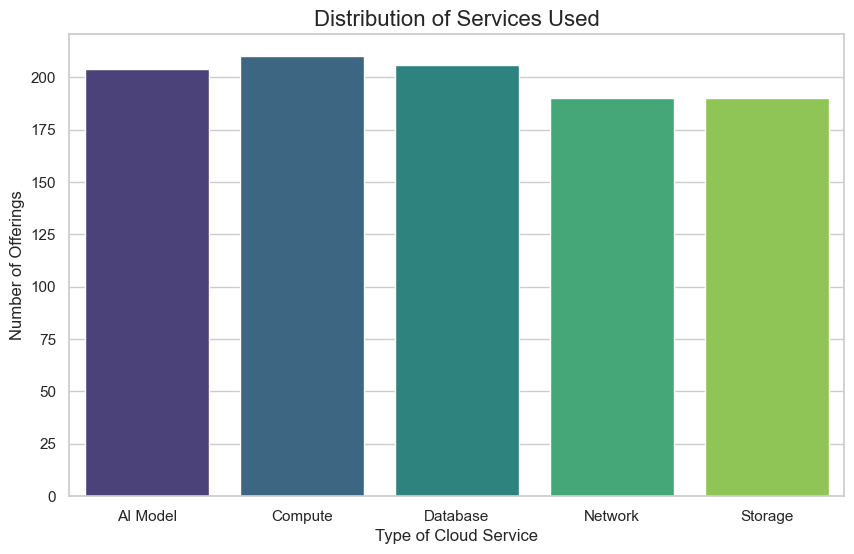

In [68]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, x="Service_Type", palette="viridis")
plt.title('Distribution of Services Used', fontsize=16)
plt.xlabel('Type of Cloud Service', fontsize=12)
plt.ylabel('Number of Offerings', fontsize=12)
plt.show()

We have almost equal counts in each service of the dataset.

### **Comparing Service_Type with Cloud_Provider**

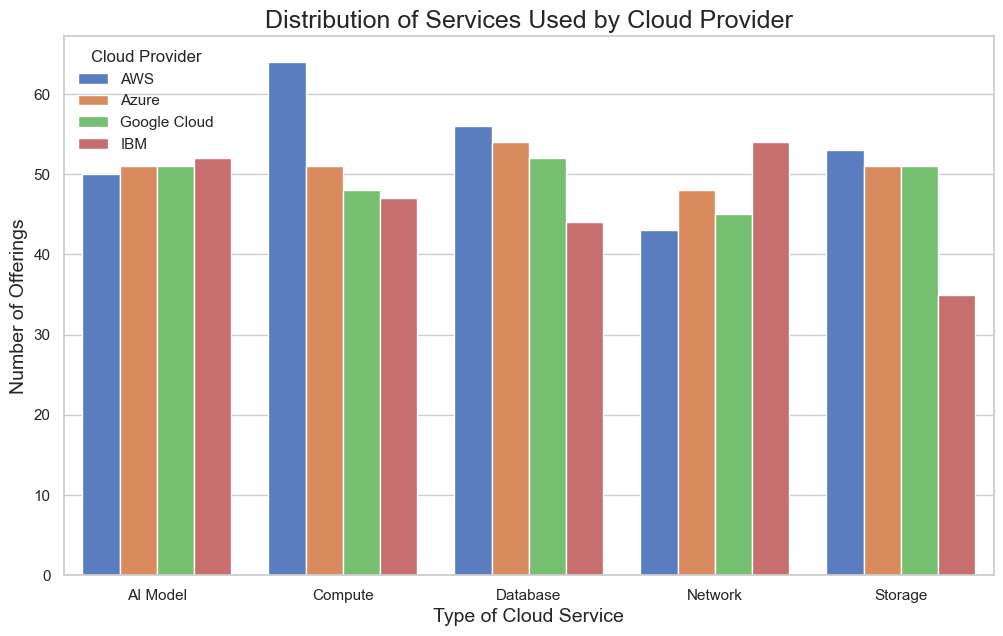

In [69]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
ax = sns.countplot(
    data=df,
    x="Service_Type",
    hue="Cloud_Provider",
    palette="muted" 
)
ax.set_title('Distribution of Services Used by Cloud Provider', fontsize=18)
ax.set_xlabel('Type of Cloud Service', fontsize=14)
ax.set_ylabel('Number of Offerings', fontsize=14)
plt.legend(title='Cloud Provider')
plt.show()

Again, we see that the distribution of services based on the cloud provider is almost similar.

## **Let's analyse each of the service types in detail**
To assess performance stability across cloud platforms, we will conduct a detailed analysis of each service type. Our primary metric is the Coefficient of Variation (CV), which quantifies relative variability by expressing the standard deviation as a percentage of the mean. A lower CV indicates less variance relative to the average performance, signifying a more stable and predictable service. Our goal is to identify the provider that consistently demonstrates the lowest CV.


_**Helper functions**_

Let's create some helper functions to make our analysis easier.

In [70]:
def metrics_call():
    metrics=df.describe().columns.to_list()
    return metrics

The `freqCreator` function is to create frequency plot to analyse our data distribution.

In [71]:
def freqCreator(factor, service_type, df):

    use_df = df[df["Service_Type"] == service_type]
    plt.style.use('seaborn-v0_8-whitegrid')
    cloud_providers = use_df['Cloud_Provider'].unique()
    num_providers = len(cloud_providers)

    ncols = 2
    nrows = (num_providers + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7 * ncols, 6 * nrows), sharey=True)
    axes = axes.flatten()

    for i, provider in enumerate(cloud_providers):
        ax = axes[i]
        provider_use_df = use_df[use_df['Cloud_Provider'] == provider]

        sns.histplot(data=provider_use_df, x=factor, kde=True, ax=ax, bins=10)

        mean_val = provider_use_df[factor].mean()
        std_val = provider_use_df[factor].std()
        if mean_val != 0:
            cv_val = (std_val / mean_val) * 100
        else:
            cv_val = 0

        ax.text(0.95, 0.95, f'CV: {cv_val:.2f}%',
                transform=ax.transAxes, fontsize=12,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

        ax.set_title(f'Distribution for {provider}', fontsize=14)
        ax.set_xlabel(factor, fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)

    for j in range(num_providers, len(axes)):
        axes[j].set_visible(False)

    fig.suptitle(f'Distribution of {service_type} {factor} by Provider', fontsize=18)

    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()


### **Analysing Compute Services**

Some performance metrics related to compute services include,
 - `CPU_Utilization (%)`
 - `Memory_Usage (MB)`
 - `Service_Latency (ms)`
 - `Response_Time (ms)`


Let's inspect compute services based on these metrics for various cloud providers.

First let's filter the dataset for compute services, and store them in compute_df

In [72]:
compute_df=df[df["Service_Type"]=="Compute"]
compute_df

,Service_ID,Service_Type,Cloud_Provider,Edge_Node_ID,CPU_Utilization (%),Memory_Usage (MB),Storage_Usage (GB),Network_Bandwidth (Mbps),Service_Latency (ms),Response_Time (ms),Throughput (Requests/sec),Load_Balancing (%),QoS_Score (%),Workload_Variability,Optimal_Service_Placement
18,S0019,Compute,AWS,E4,26.162875,7105,753,227.887790,280.222205,372.075923,504.369484,50.772371,57.691296,1,False
23,S0024,Compute,Google Cloud,E4,48.645473,2921,141,968.987860,61.982202,37.306713,59.290411,87.333548,96.661253,1,True
24,S0025,Compute,Google Cloud,E2,35.426545,519,314,269.719537,144.035941,456.746646,121.366765,54.691094,96.918080,3,False
33,S0034,Compute,Google Cloud,E2,41.961653,7248,948,321.677571,256.828092,301.126832,535.148835,91.276541,69.774001,1,False
38,S0039,Compute,Google Cloud,E3,80.882734,6485,539,894.658641,165.919650,132.666731,156.054133,94.825213,75.142153,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,S0956,Compute,Google Cloud,E4,70.559772,5292,844,220.162785,21.032689,336.597658,507.128744,51.826019,54.160091,1,False
959,S0960,Compute,AWS,E1,41.787838,3116,294,24.237424,219.605738,272.380582,643.154063,87.971435,51.107831,3,False
966,S0967,Compute,IBM,E2,67.319134,4316,456,756.991547,295.201835,376.373252,578.895692,85.147377,99.722504,1,False
996,S0997,Compute,Azure,E1,62.715483,6972,468,770.290278,200.980113,305.196144,536.685343,96.013618,91.925050,2,False


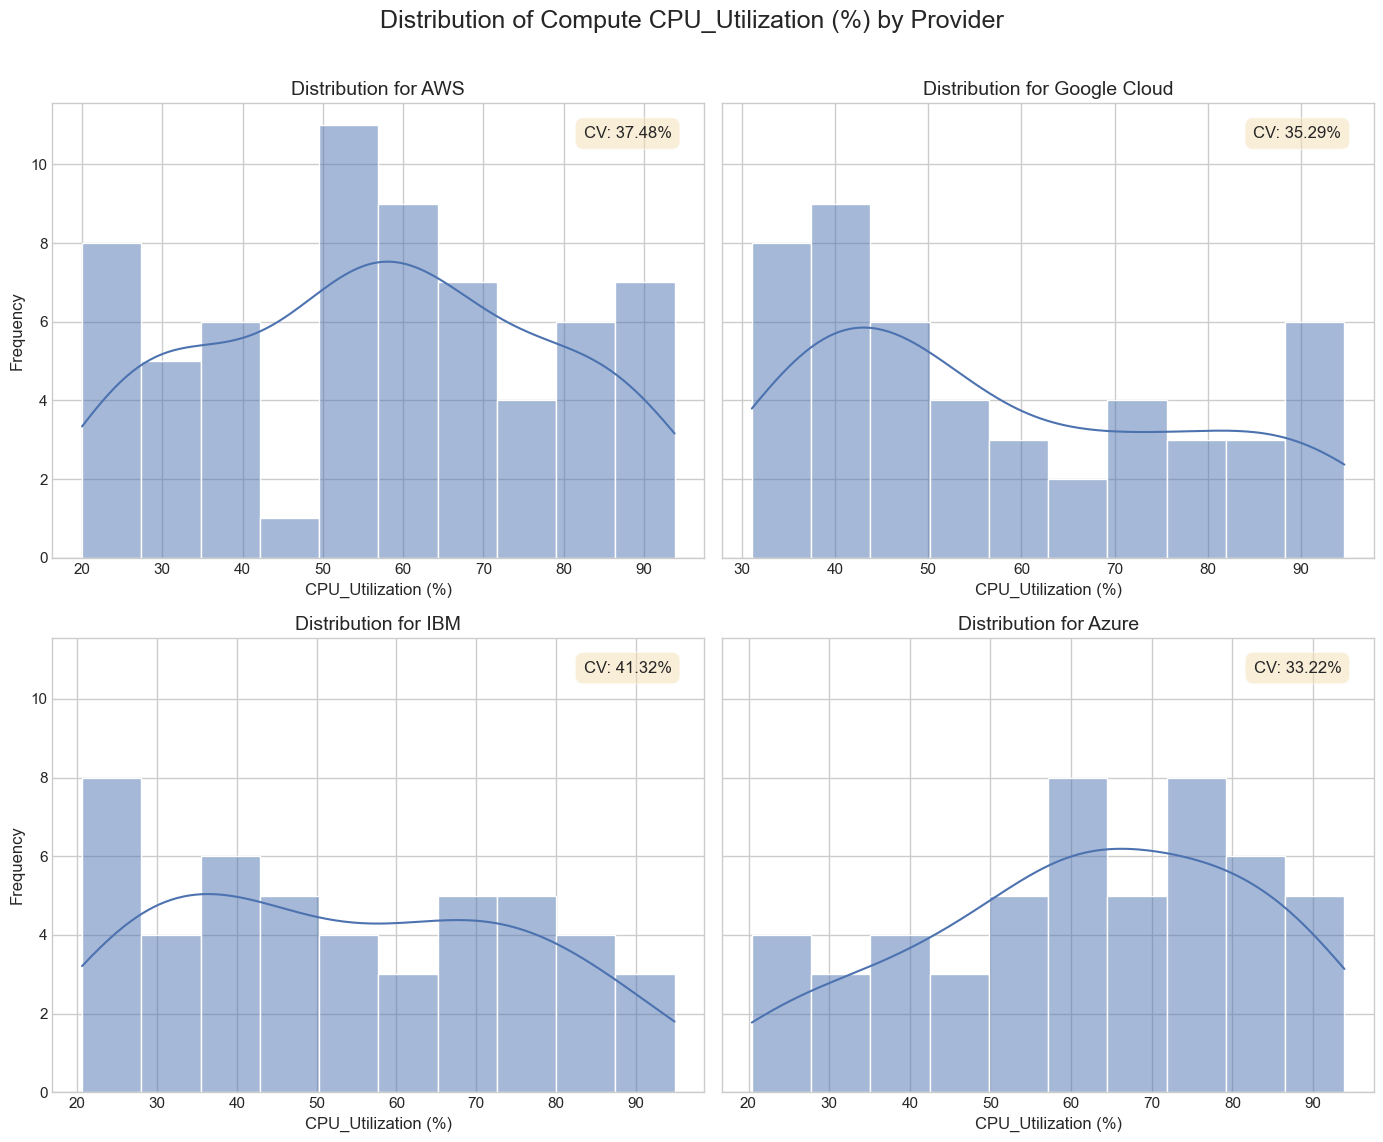

In [73]:
factor="CPU_Utilization (%)"
service_type="Compute"
out=freqCreator(factor,service_type, compute_df)

From the visualisation its evident that `Azure` provides a more predictable CPU performance for compute services. The distribution of data and less CV suggests the same.

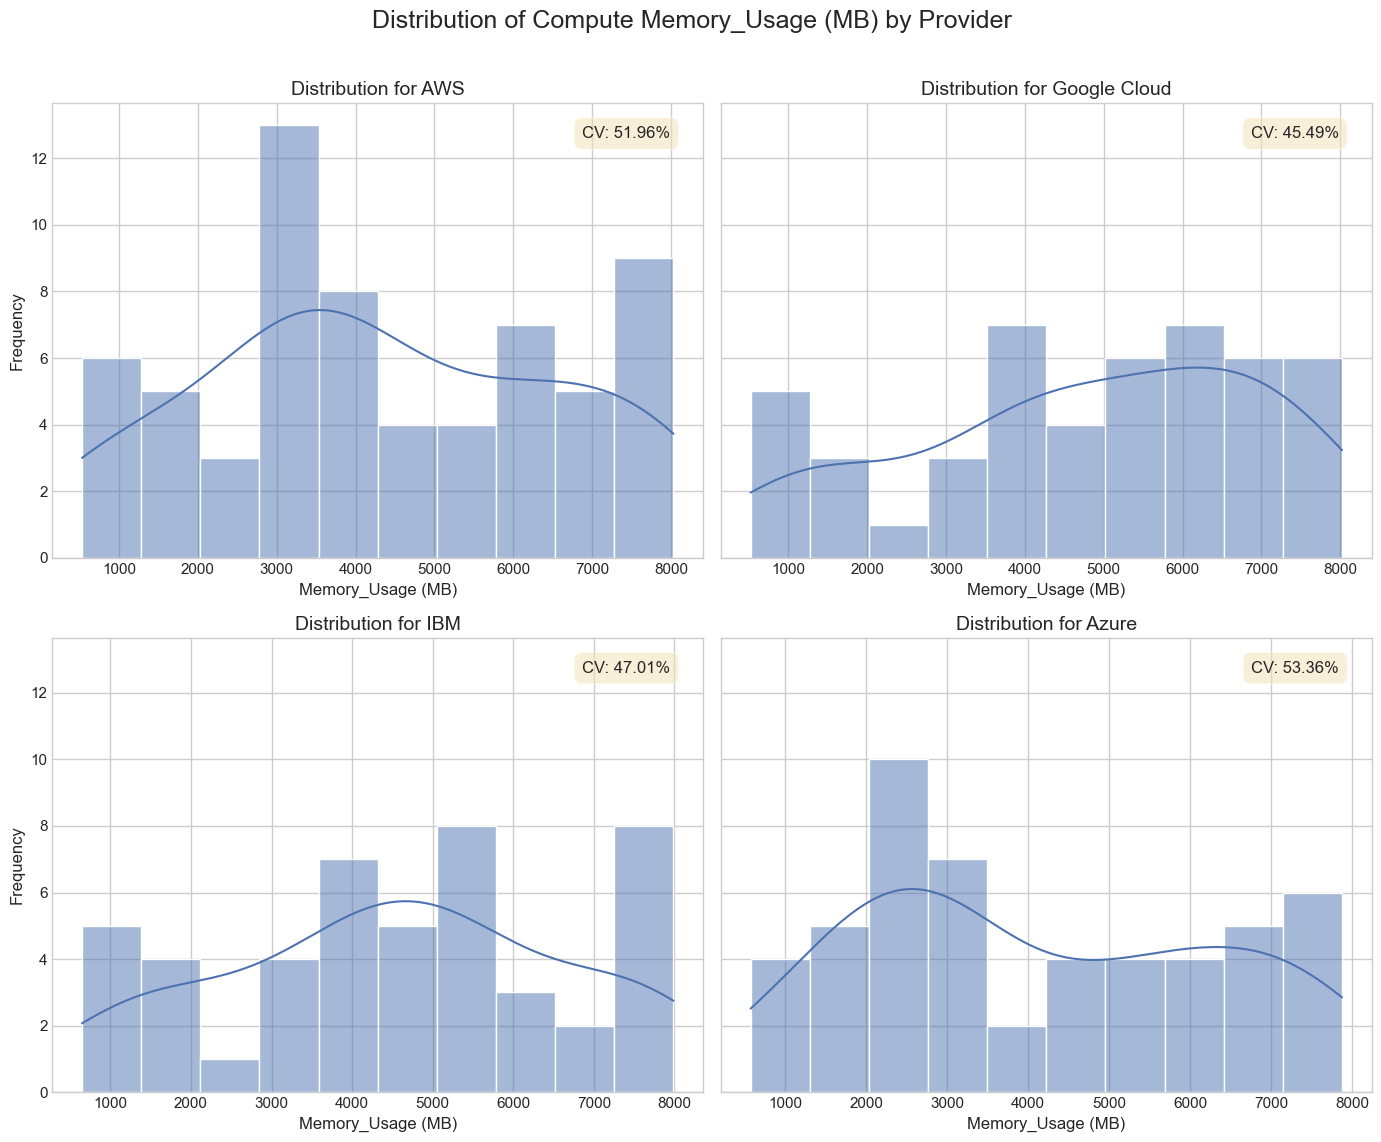

In [74]:
factor="Memory_Usage (MB)"
service_type="Compute"
out=freqCreator(factor,service_type, compute_df)

When it comes to memory utilisation `GCP` clearly wins !

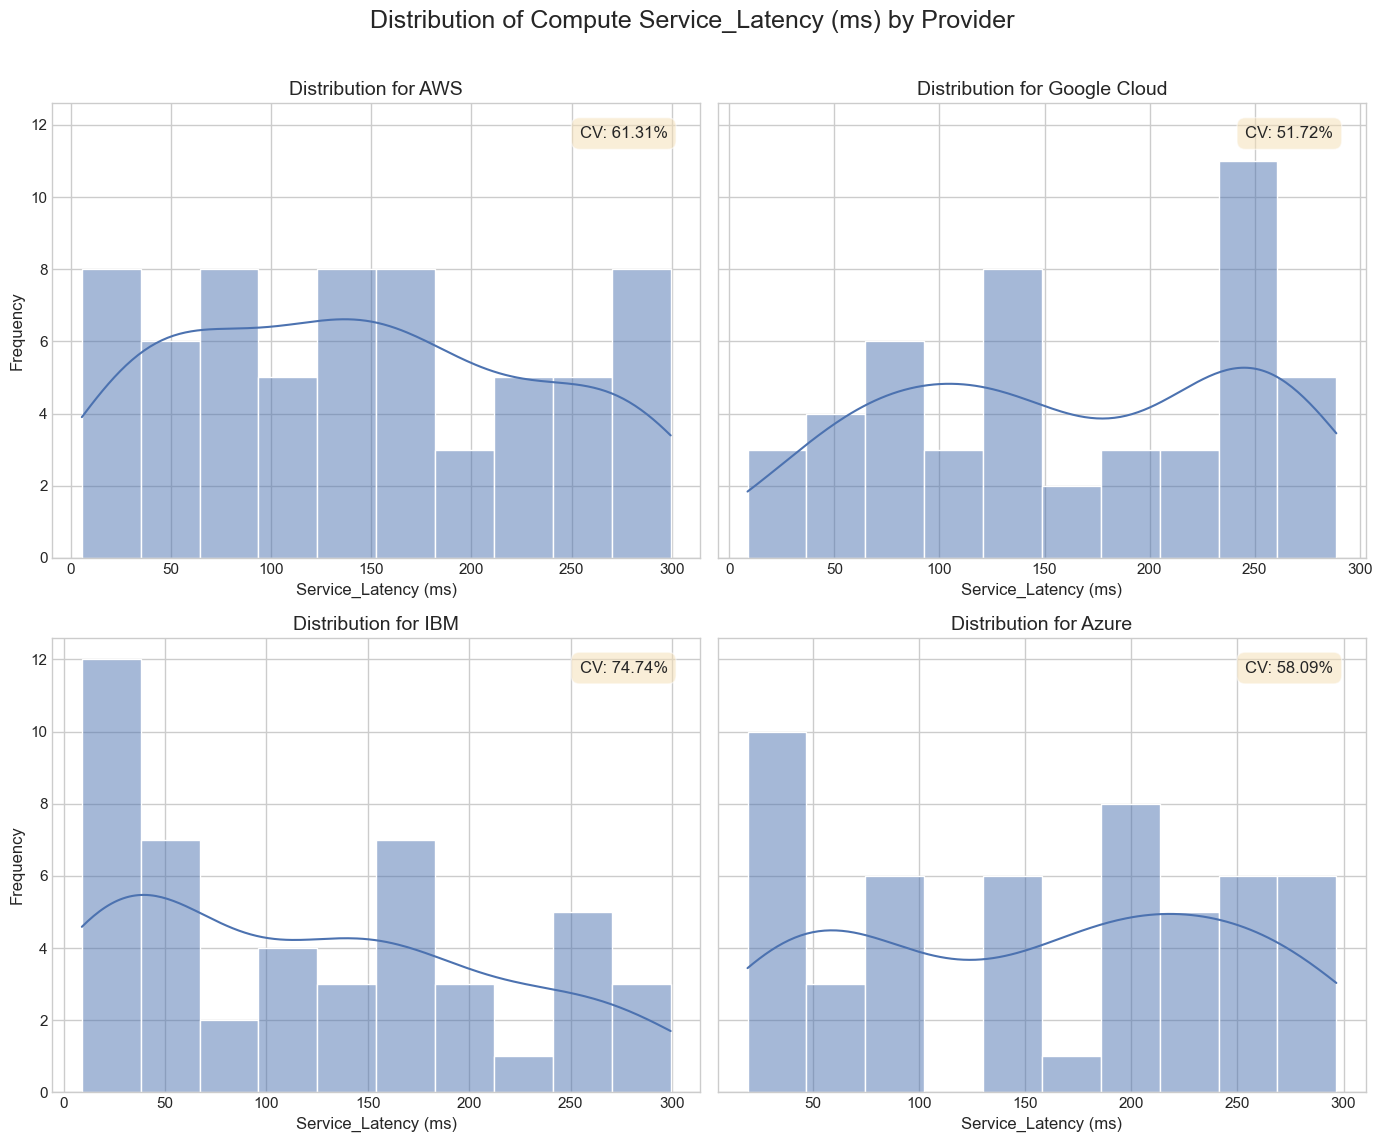

In [75]:
factor="Service_Latency (ms)"
service_type="Compute"
out=freqCreator(factor,service_type, compute_df)

When it comes to latency `GCP` has a more uniform distribution with a less CV, followed by `Azure`.

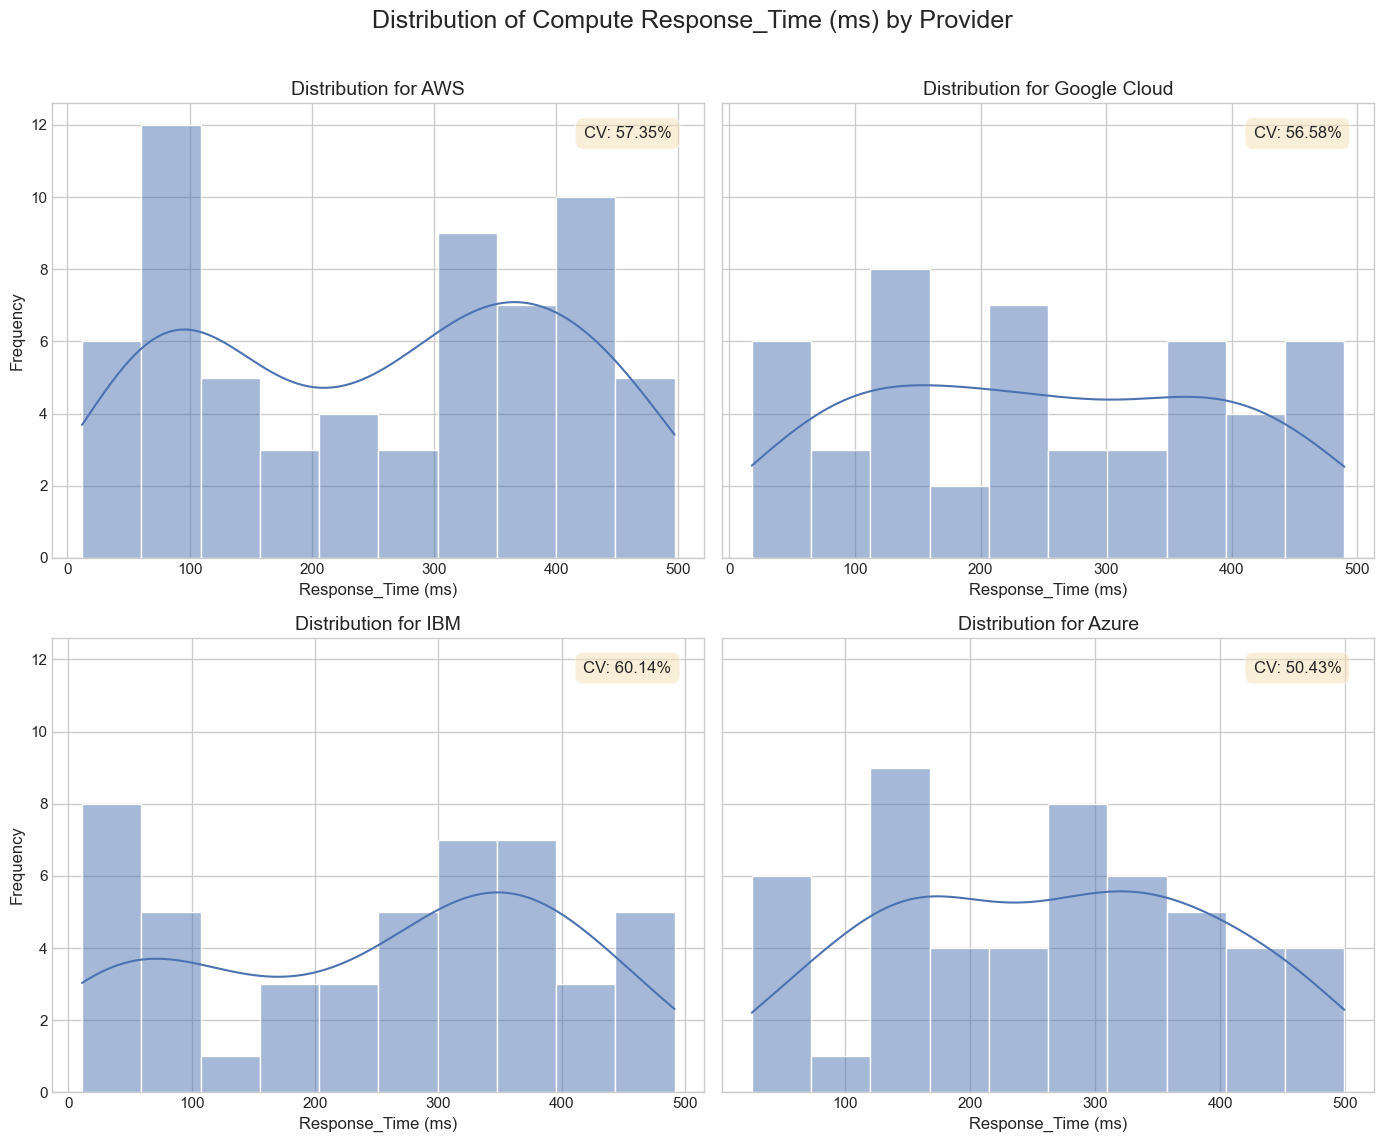

In [76]:
factor="Response_Time (ms)"
service_type="Compute"
out=freqCreator(factor,service_type, compute_df)

`Azure` has a very consistent response time compared to other cloud providers, followed by `GCP`.

### **Analysing Storage Services**

Some performance metrics related to storage services include,
 - `Service_Latency (ms)`
 - `Throughput (Requests/sec)`


Let's get started with the analysis

In [77]:
storage_df=df[df["Service_Type"]=="Storage"]
storage_df

,Service_ID,Service_Type,Cloud_Provider,Edge_Node_ID,CPU_Utilization (%),Memory_Usage (MB),Storage_Usage (GB),Network_Bandwidth (Mbps),Service_Latency (ms),Response_Time (ms),Throughput (Requests/sec),Load_Balancing (%),QoS_Score (%),Workload_Variability,Optimal_Service_Placement
5,S0006,Storage,AWS,E1,75.313127,6021,363,900.267755,246.995606,377.766640,823.836952,78.741952,89.195979,1,False
13,S0014,Storage,Google Cloud,E3,27.379674,1808,549,295.125292,76.342268,182.342855,456.132180,88.824344,85.817724,1,True
15,S0016,Storage,AWS,E1,77.327950,6442,404,38.863634,290.484133,43.960809,369.492690,66.438714,54.921735,2,False
20,S0021,Storage,IBM,E2,42.158358,5878,590,713.013619,160.194343,275.206725,511.349197,61.213671,95.746497,3,False
27,S0028,Storage,AWS,E3,78.097534,2531,951,59.712287,157.601577,226.336922,54.640243,74.707880,67.810566,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,S0984,Storage,Azure,E1,35.688910,3178,511,268.309394,50.552648,299.762335,274.739529,64.947386,89.362515,3,False
989,S0990,Storage,Google Cloud,E1,38.148285,1791,448,708.896674,106.853043,161.834168,873.106033,75.600906,54.236434,2,False
990,S0991,Storage,Azure,E4,92.047023,7216,68,508.651723,55.963243,258.679456,81.657039,99.612096,81.148644,3,False
993,S0994,Storage,Azure,E3,94.611447,1182,800,624.038941,287.929851,221.640080,663.471219,76.278969,95.199000,1,False


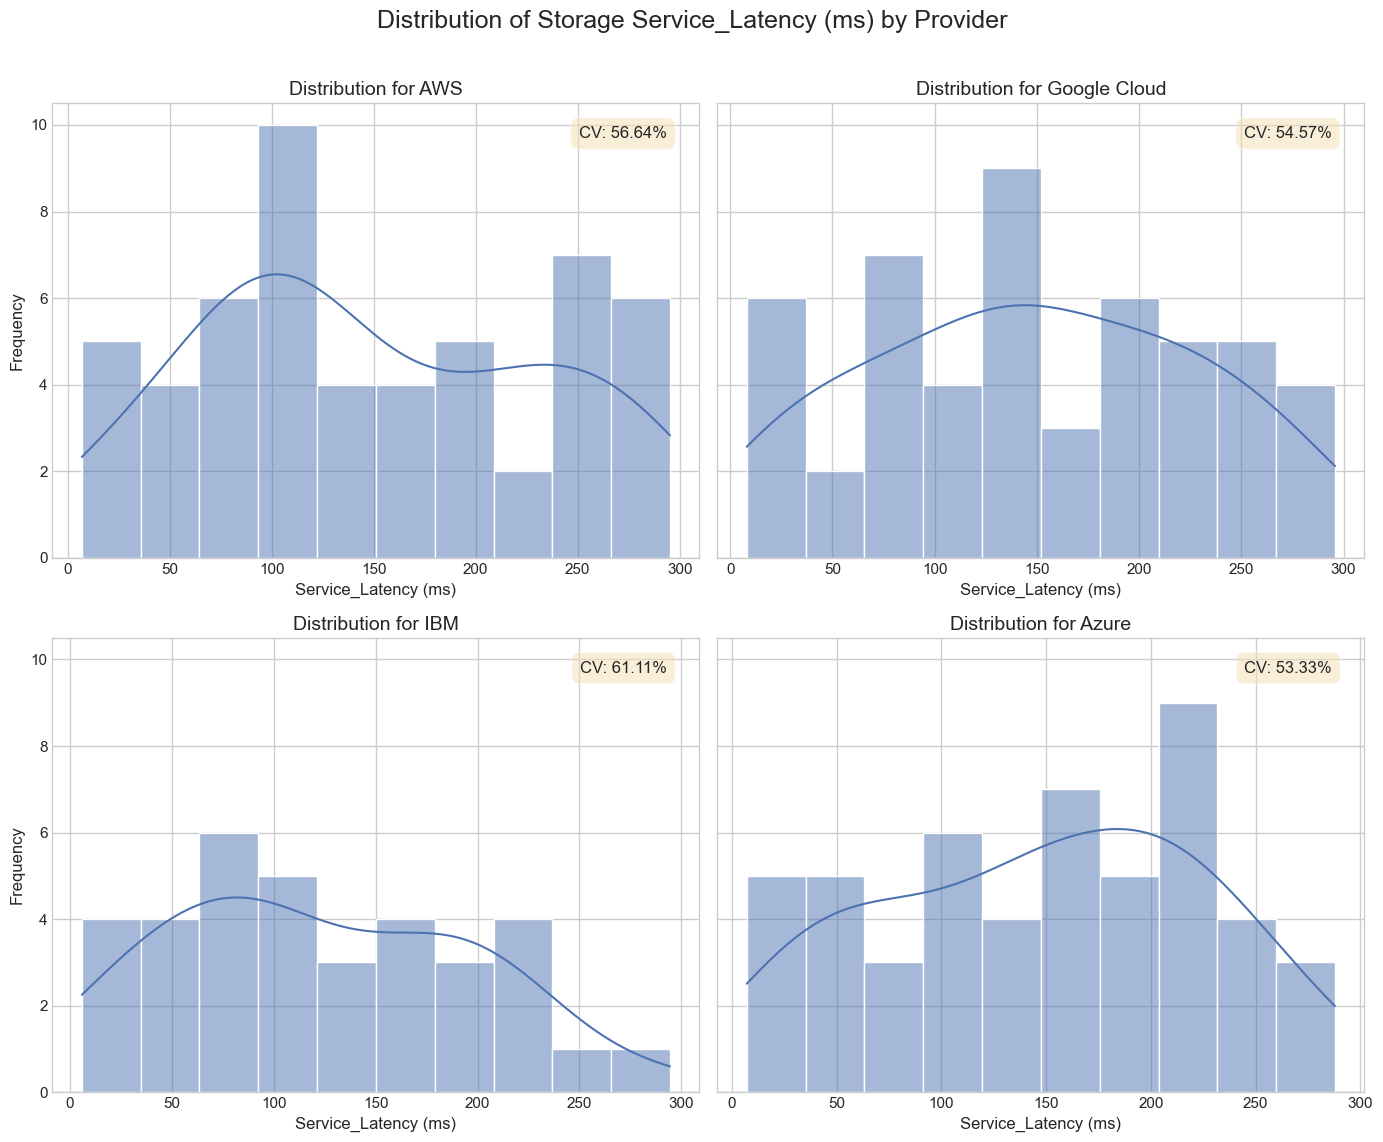

In [78]:
factor="Service_Latency (ms)"
service_type="Storage"
out=freqCreator(factor,service_type, storage_df)

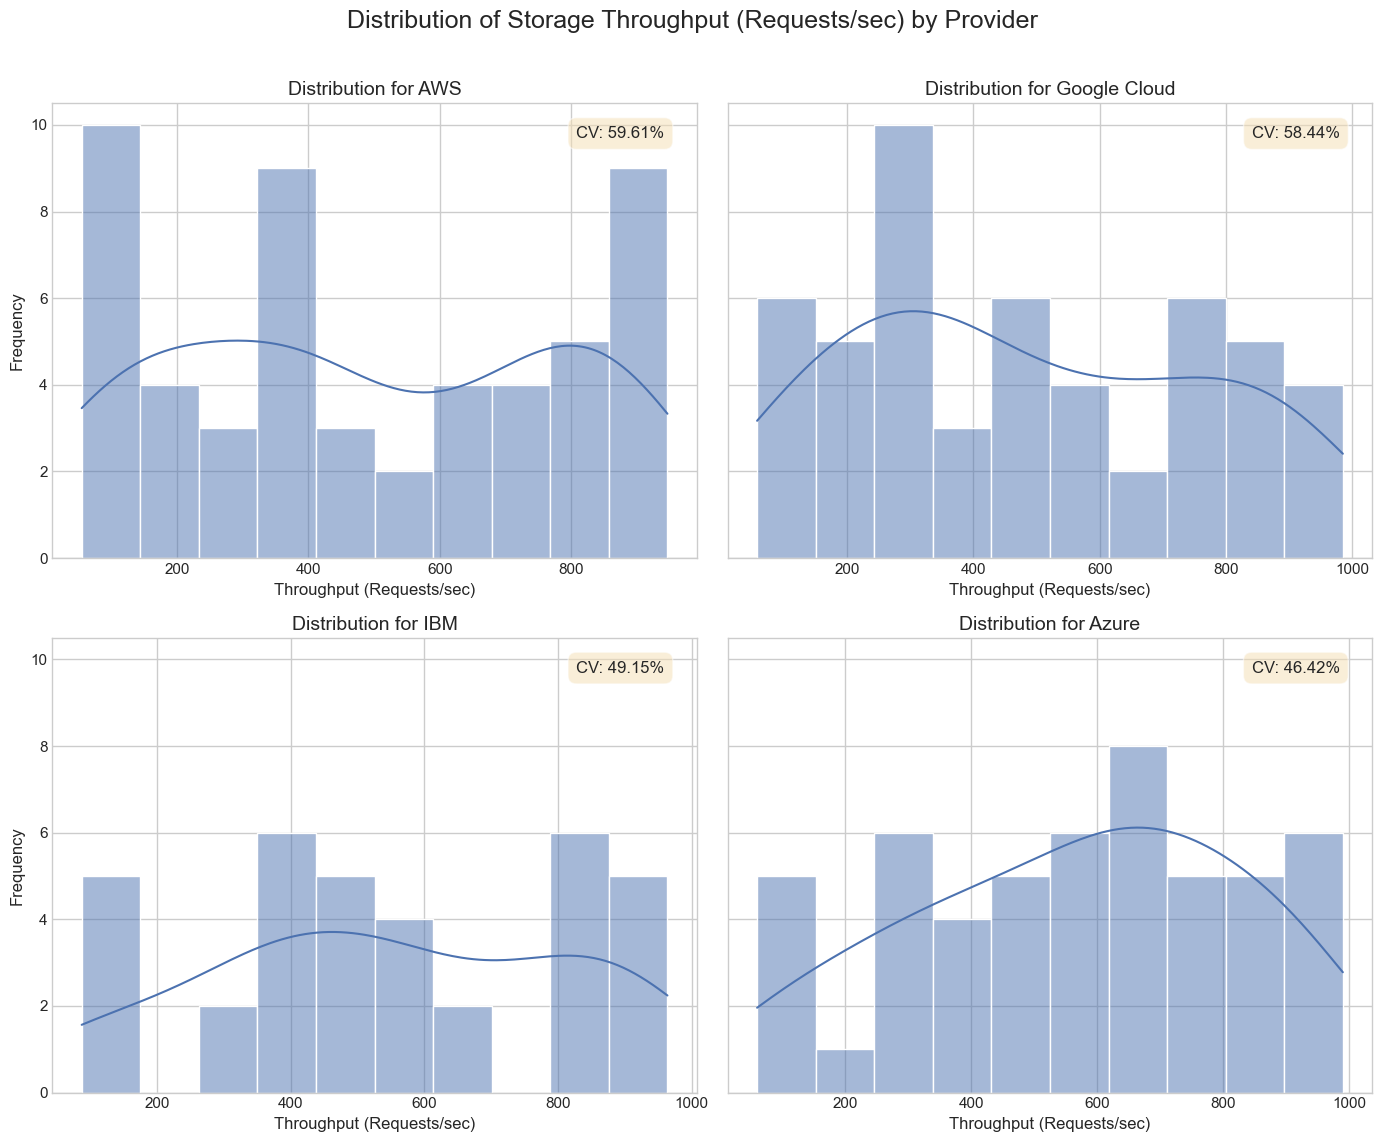

In [79]:
factor="Throughput (Requests/sec)"
service_type="Storage"
out=freqCreator(factor,service_type, storage_df)

When it comes to storage services `Azure` shows a better predictability for both the metrics `Throughput (Requests/sec)` and `Service_Latency (ms)`.

| Metric          | Best Provider  | Reasoning                                                              |
| :-------------- | :------------- | :--------------------------------------------------------------------- |
| Service_Latency (ms)| **Azure**       | Consistent performance |
| Throughput (Requests/sec) | **Azure**        | Consistent performance |


### **Analysing Database Services**

Some performance metrics related to database services include,
 - `Service_Latency (ms)`
 - `Throughput (Requests/sec)`
 - `CPU_Utilization (%)`
 - `Memory_Usage (MB)`


In [80]:
database_df=df[df["Service_Type"]=="Database"]
database_df

,Service_ID,Service_Type,Cloud_Provider,Edge_Node_ID,CPU_Utilization (%),Memory_Usage (MB),Storage_Usage (GB),Network_Bandwidth (Mbps),Service_Latency (ms),Response_Time (ms),Throughput (Requests/sec),Load_Balancing (%),QoS_Score (%),Workload_Variability,Optimal_Service_Placement
0,S0001,Database,IBM,E3,73.724254,6966,458,684.539483,161.677301,473.292482,992.471026,83.072391,80.397885,3,False
10,S0011,Database,Azure,E2,69.602796,4154,856,542.405105,248.318050,491.305470,341.078858,99.222098,72.602189,2,False
14,S0015,Database,Azure,E4,69.522704,5226,770,560.764727,130.669268,225.688361,746.196420,87.457891,61.212919,1,False
16,S0017,Database,Azure,E2,39.878482,756,534,908.176455,199.040788,293.327007,362.174123,80.543004,95.840329,1,False
19,S0020,Database,Azure,E4,92.589503,1441,93,523.093415,178.020975,24.293247,221.604863,71.786718,89.671829,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,S0982,Database,AWS,E1,32.431233,3705,298,951.310473,78.395134,151.531313,497.529543,89.166835,55.917267,3,False
982,S0983,Database,AWS,E3,53.415623,8158,575,217.798653,273.513913,296.946042,440.591486,67.615118,99.822525,2,False
987,S0988,Database,Azure,E1,79.485716,1409,605,854.397120,86.757584,172.186054,850.334137,56.308480,89.498738,3,False
992,S0993,Database,Google Cloud,E1,91.357236,7003,540,513.060301,265.182789,428.988409,162.444116,53.064940,52.172812,2,False


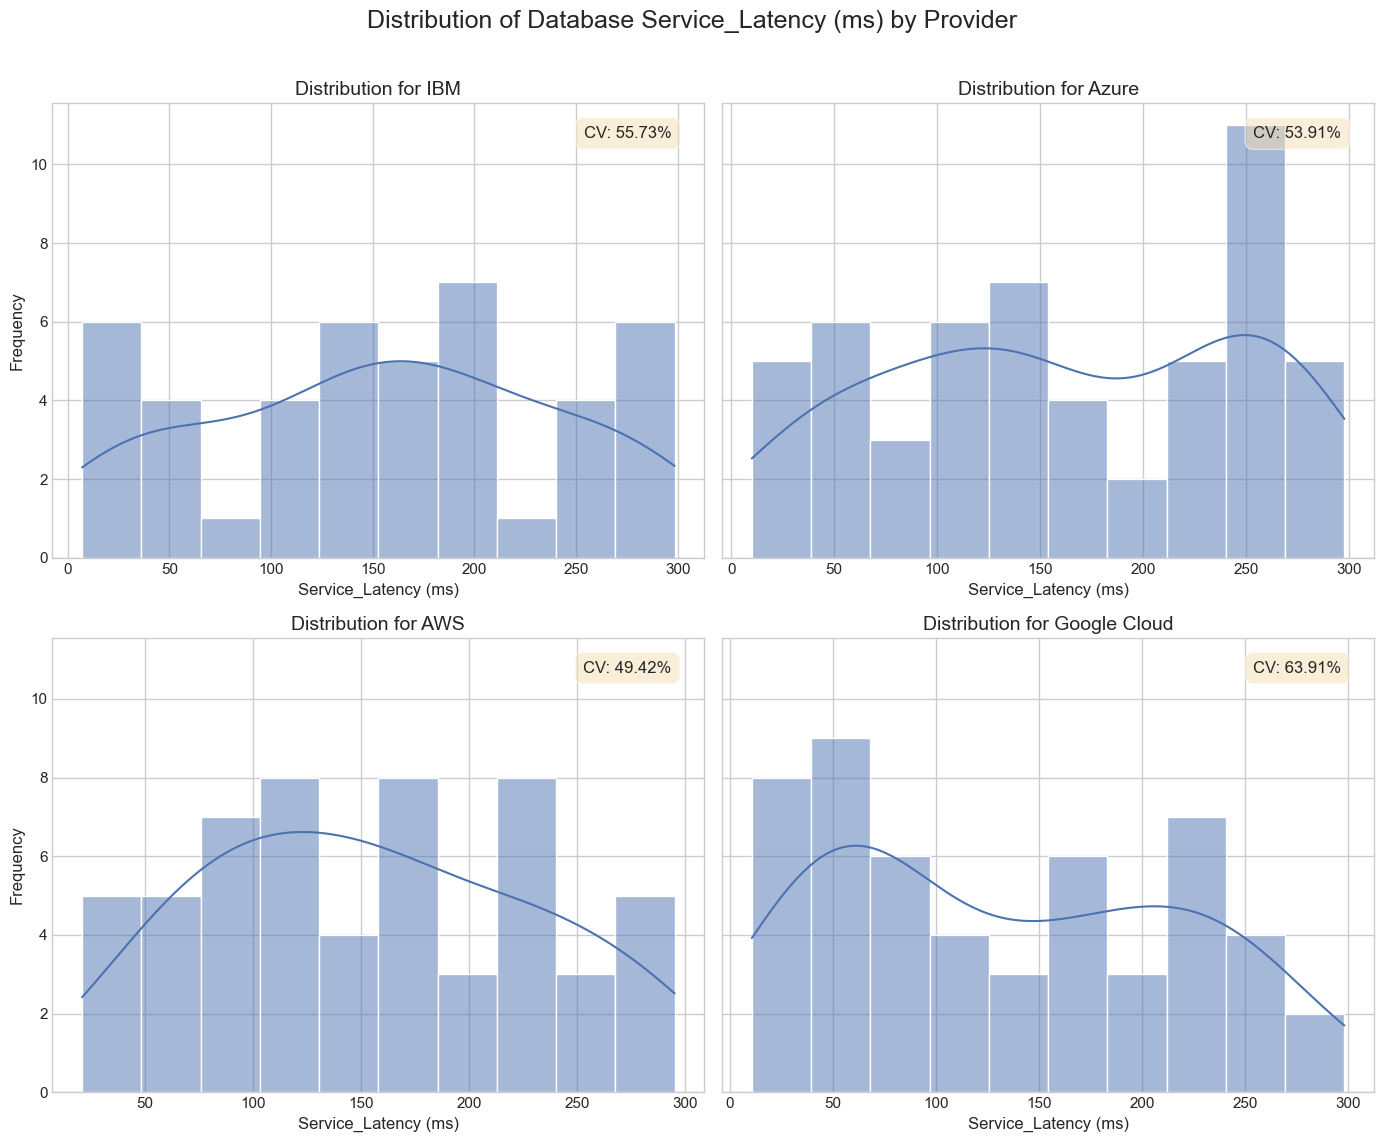

In [81]:
factor="Service_Latency (ms)"
service_type="Database"
out=freqCreator(factor,service_type, database_df)

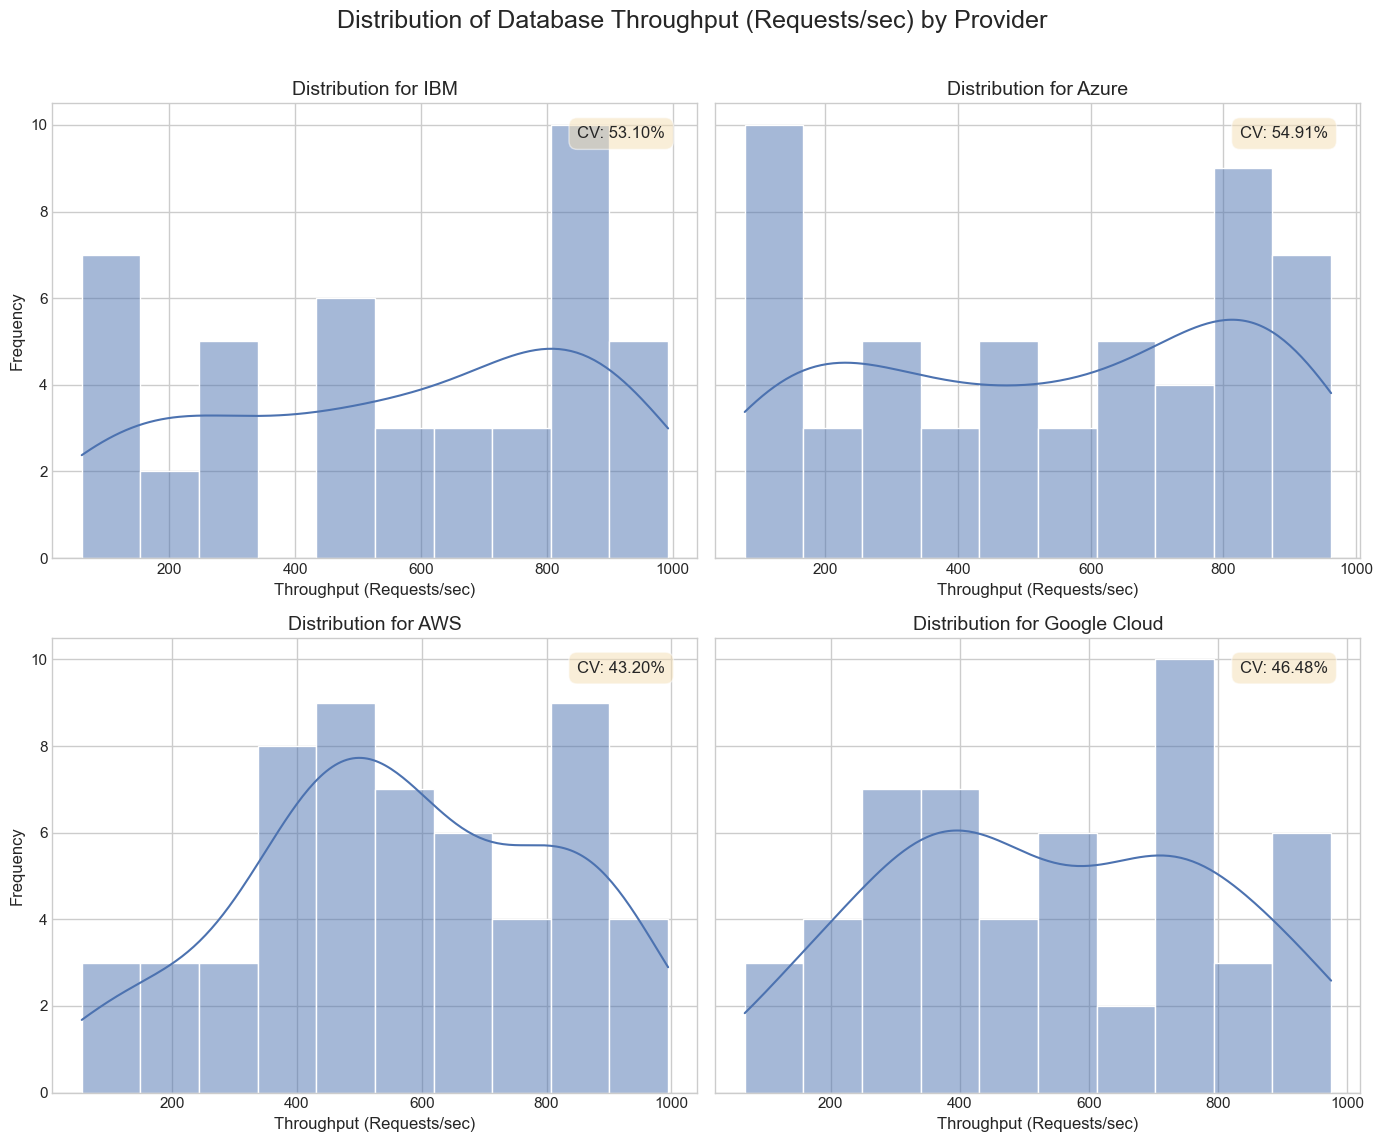

In [82]:
factor="Throughput (Requests/sec)"
service_type="Database"
out=freqCreator(factor,service_type, database_df)

Visual representation shows that `AWS` has a more predictable data distribution for both latency and throughput for database services. This is also indicated by the lower CV.

#### **Resource Utilization**

Let's analyse the metrics related to resource utilization for databases,
- `CPU Utilization`
- `Memory Usage`

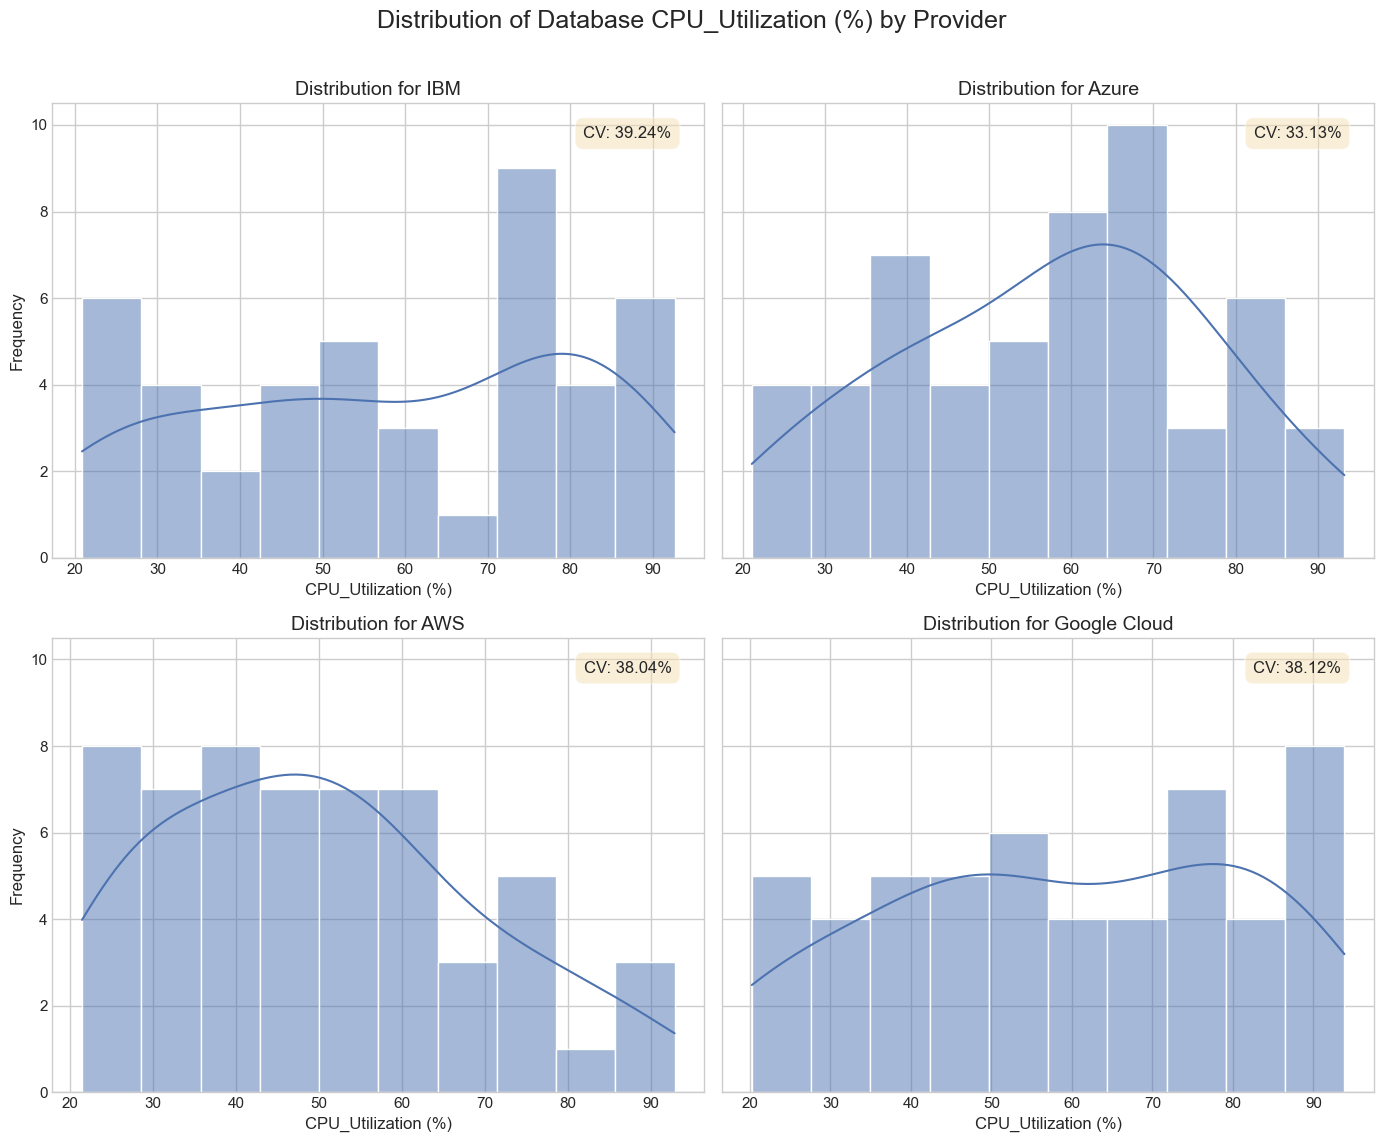

In [83]:
factor="CPU_Utilization (%)"
service_type="Database"
out=freqCreator(factor,service_type, database_df)

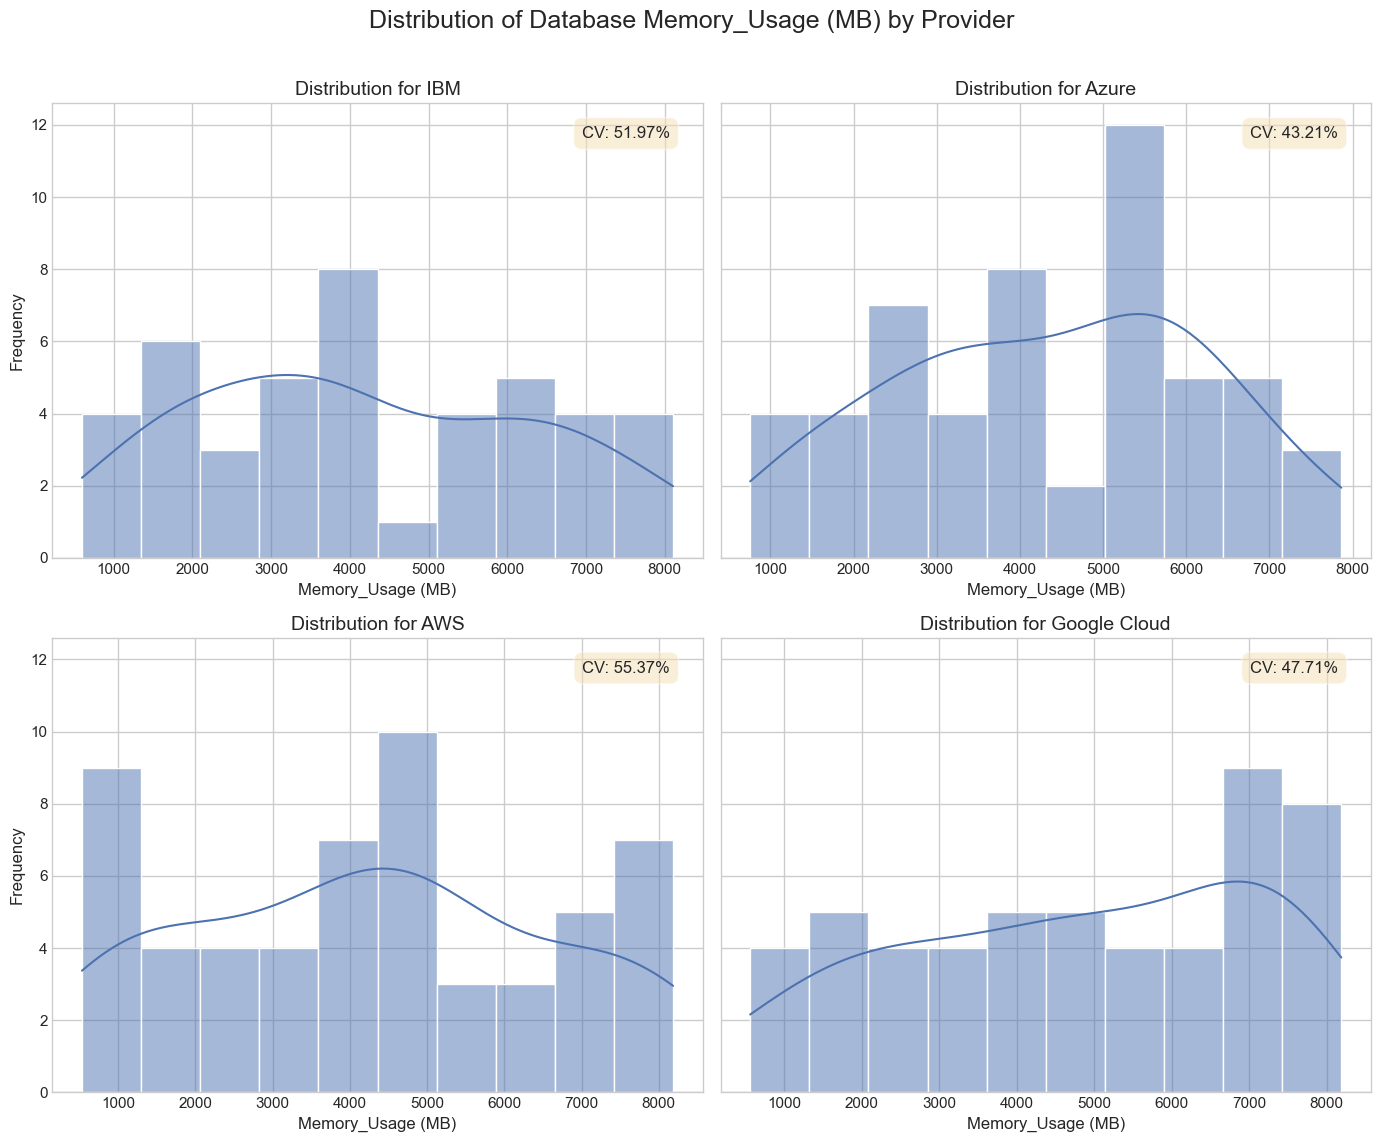

In [84]:
factor="Memory_Usage (MB)"
service_type="Database"
out=freqCreator(factor,service_type, database_df)

When it comes to resource utilization, we see that `Azure` has the most predicatable performance in both CPU and Memory utilisation.

## **Conclusion**

Below table summarizes all the services analysed, and gives a perspective on strength and weaknesses various cloud platform.

Compute Services

| Metric          | Best Provider  | Reasoning                                                              |
| :-------------- | :------------- | :--------------------------------------------------------------------- |
| CPU_Utilization (%) | **Azure**        | Best overall performance and low Coefficient of Variation (CV).          |
| Memory_Usage (MB)| **GCP**        | Better performance and high consistency, indicated by a low CV.        |
| Service_Latency (ms)| **GCP**      | Clear winner, supported by low CV and data distribution. |
| Response_Time (ms) | **Azure**        | Better data distribution, and lower CV |


Storage services

| Metric          | Best Provider  | Reasoning                                                              |
| :-------------- | :------------- | :--------------------------------------------------------------------- |
| Service_Latency (ms)| **Azure**       | Consistent performance |
| Throughput (Requests/sec) | **Azure**        | Consistent performance |


Database services

| Metric              | Best Provider | Reasoning                                                                              |
| :------------------ | :------------ | :------------------------------------------------------------------------------------- |
| CPU Utilization     | **Azure**     | Exhibits the most predictable performance, indicating high stability in resource management. |
| Memory Utilization  | **Azure**     | Shows the most consistent memory usage, as indicated by its low performance variability.   |
| Database Latency    | **AWS**       | Demonstrates a more predictable data distribution and the lowest Coefficient of Variation (CV). |
| Database Throughput | **AWS**       | Offers the most stable throughput, supported by its tight data distribution and low CV.      |


## **References**
1. https://docs.aws.amazon.com/
2. https://www.kaggle.com/
3. https://cloud.google.com/monitoring/api/metrics_gcp
